In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.shape

(10000, 14)

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
df[['HasCrCard','IsActiveMember','Exited']]=df[['HasCrCard','IsActiveMember','Exited']].astype('object')

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null object
IsActiveMember     10000 non-null object
EstimatedSalary    10000 non-null float64
Exited             10000 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [10]:
df.describe(include='object')

,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,Male,1,1,0
freq,5014,5457,7055,5151,7963


In [11]:
num_df=df.select_dtypes(np.number)
num_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

## Checking Significance of variable using Statistical Techniques

In [12]:
from scipy.stats import ttest_ind

In [13]:
df_churn=df[df['Exited']==1]
df_not_churn=df[df['Exited']==0]

In [14]:
for i in num_df.columns:
    _,pval=ttest_ind(df_churn[i],df_not_churn[i])
    print(i,pval)

CreditScore 0.006738213892192373
Age 1.2399313093427738e-186
Tenure 0.16152684949473256
Balance 1.2755633191525477e-32
NumOfProducts 1.717333004804293e-06
EstimatedSalary 0.22644042802223346


Region Wise seperation of dataset for better model buiding 

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [17]:
df_France.shape,df_Germany.shape,df_Spain.shape

((5014, 11), (2509, 11), (2477, 11))

In [18]:
from scipy.stats import f_oneway
for i in num_df.columns:
    _,pval=f_oneway(df_France[i],df_Germany[i],df_Spain[i])
    print(i,pval)

CreditScore 0.6707197151786737
Age 5.60622043878216e-06
Tenure 0.925249785691543
Balance 0.0
NumOfProducts 0.487955050430974
EstimatedSalary 0.5583736355799094


## Building model for **France Region**


In [19]:
df[['HasCrCard','IsActiveMember','Exited']]=df[['HasCrCard','IsActiveMember','Exited']].astype(np.number)

In [20]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [21]:
df_France.shape

(5014, 11)

In [22]:
df_France.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1.0
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1.0
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0.0
6,822,France,Male,50,7,0.00,2,1.0,1.0,10062.80,0.0
8,501,France,Male,44,4,142051.07,2,0.0,1.0,74940.50,0.0


In [23]:
df_France=df_France.drop('Geography',axis=1)

In [24]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        5014 non-null int64
Gender             5014 non-null object
Age                5014 non-null int64
Tenure             5014 non-null int64
Balance            5014 non-null float64
NumOfProducts      5014 non-null int64
HasCrCard          5014 non-null float64
IsActiveMember     5014 non-null float64
EstimatedSalary    5014 non-null float64
Exited             5014 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 430.9+ KB


In [25]:
x=pd.get_dummies(df_France['Gender'],drop_first=True,prefix='Gender')

In [26]:
df_France['Gender_Male']=x

In [27]:
df_France.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,Female,42,2,0.00,1,1.0,1.0,101348.88,1.0,0
2,502,Female,42,8,159660.80,3,1.0,0.0,113931.57,1.0,0
3,699,Female,39,1,0.00,2,0.0,0.0,93826.63,0.0,0
6,822,Male,50,7,0.00,2,1.0,1.0,10062.80,0.0,1
8,501,Male,44,4,142051.07,2,0.0,1.0,74940.50,0.0,1


In [28]:
df_France=df_France.drop('Gender',axis=1)

In [29]:
df_France['Gender_Male']=df_France['Gender_Male'].astype('int')

In [30]:
df_France['Exited'].value_counts()

0.0    4204
1.0     810
Name: Exited, dtype: int64

In [31]:
y=df_France['Exited']
x=df_France.drop('Exited',axis=1)

## Checking Variable importance using Statistical Methods

In [32]:
import statsmodels.api  as sm
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.382955
         Iterations 7


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 5014
Model:                          Logit   Df Residuals:                     5004
Method:                           MLE   Df Model:                            9
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:                  0.1340
Time:                        13:33:21   Log-Likelihood:                -1920.1
converged:                       True   LL-Null:                       -2217.3
Covariance Type:            nonrobust   LLR p-value:                3.353e-122
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.5622      0.362     -9.850      0.000      -4.271      -2.853
CreditScore        -0.0010      0.000     -2.401      0.016      -0.002      -0.000
Age                 0.0757      0.004     19.822      0.000       0.068       0.083
Tenure             -0.0014      0.014     -0.100      0.921      -0.029       0.026
Balance            2.8e-06   6.82e-07      4.109      0.000    1.46e-06    4.14e-06
NumOfProducts      -0.0654      0.074     -0.879      0.379      -0.211       0.080
HasCrCard           0.0069      0.090      0.076      0.939      -0.170       0.184
IsActiveMember     -1.0755      0.089    -12.075      0.000      -1.250      -0.901
EstimatedSalary  1.701e-06   7.25e-07      2.346      0.019     2.8e-07    3.12e-06
Gender_Male        -0.5944      0.083     -7.176      0.000      -0.757      -0.432
===================================================================================
"""

We can see that tenure,numOfProducts and HasCrCard is not significant variable as pvalues>0.05 but we will also check feature imporatnce of these variable through machine learning approach.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns)

,0
const,80.195448
CreditScore,1.002306
Age,1.013138
Tenure,1.001632
Balance,1.193985
NumOfProducts,1.194761
HasCrCard,1.002196
IsActiveMember,1.013914
EstimatedSalary,1.002233
Gender_Male,1.002219


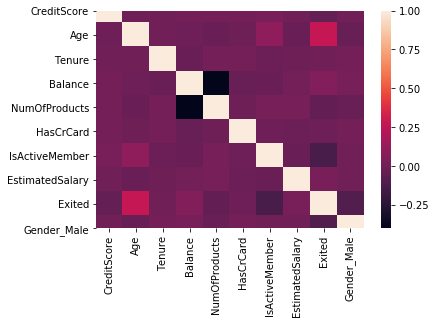

In [34]:
sns.heatmap(df_France.corr())
plt.show()

## Checking Variable importance using Machine Learning

In [35]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp


,columns,Importance
1,Age,0.231924
7,EstimatedSalary,0.168656
0,CreditScore,0.153190
3,Balance,0.148274
4,NumOfProducts,0.119231
2,Tenure,0.075788
6,IsActiveMember,0.059734
8,Gender_Male,0.023908
5,HasCrCard,0.019295


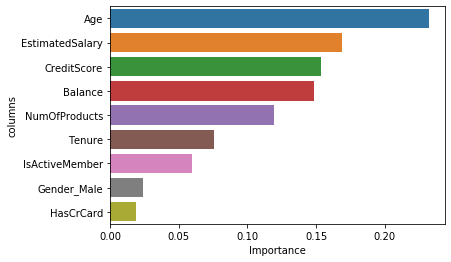

In [36]:
sns.barplot(imp['Importance'],imp['columns'])

We can see that the HasCrCard has the least importance among all the variables.
But I will build the model by considering **all the variables in consideration** for prediction. 

## Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,40),'weights':['uniform','distance']}
gsearch=GridSearchCV(knn,param_grid=params,cv=10,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [39]:
knn=KNeighborsClassifier(**gsearch.best_params_)

In [40]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dtc = DecisionTreeClassifier(random_state=4)
from scipy.stats import randint as sp_randint

params = {'max_depth': sp_randint(1, 10),
          'min_samples_leaf': sp_randint(1, 20),
          'min_samples_split': sp_randint(2, 20),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, n_iter=500, scoring='roc_auc', cv=3, random_state=4,
                             return_train_score=True)
rsearch.fit(x, y)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=4),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016994FCA408>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016994FC7948>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016994FC49C8>},
                   random_state=4, return_train_score=True, scoring='roc_auc')

In [42]:
dtc = DecisionTreeClassifier(**rsearch.best_params_)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(1,200),
       'criterion':['gini','entropy'],
        'max_features':sp_randint(2,20),
        'max_depth':sp_randint(1,20),
        'min_samples_split':sp_randint(2,50),
        'min_samples_leaf':sp_randint(1,50)}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=25,n_jobs=-1,
                          scoring='roc_auc',cv=3)
rsearch_rfc.fit(x,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.84784587 0.82072856        nan 0.84266032        nan
 0.84542128        nan        nan        nan        nan        nan
        nan 0.85151334        nan        nan        nan 0.82691542
        nan        nan 0.84621207 0.84387642 0.84939093        nan
 0.85170353]
  category=UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016994FA8A88>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016994F8A6C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016994FEF648>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169936FBBC8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016994F9DA08>},
                   scoring='roc_auc')

In [44]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [45]:
from lightgbm import LGBMClassifier
from scipy.stats import uniform as sp_uniform
lgbc = LGBMClassifier()

params = {'n_estimators': sp_randint(50, 300),
         'max_depth': sp_randint(2, 10),
         'learning_rate': sp_uniform(0, 0.5),
         'num_leaves': sp_randint(10, 100)} 

rsearch_lgbc = RandomizedSearchCV(lgbc, param_distributions=params, n_iter=100, cv=3, scoring='roc_auc',
                            n_jobs=-1, random_state=4, return_train_score=True)

rsearch_lgbc.fit(x,y)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016995181A88>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016995181688>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001699502F908>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016995181AC8>},
                   random_state=4, return_train_score=True, scoring='roc_auc')

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lgb_pipe=make_pipeline(StandardScaler(),LGBMClassifier(**rsearch_lgbc.best_params_))

In [47]:
models=[]
models.append(('Logistic',lg))
models.append(('KNearestNeighbor',knn))
models.append(('GausiianNB',gb))
models.append(('Decison Tree',dtc))
models.append(('Random Forest',rfc))
models.append(('LightGBM',lgb_pipe))


Logistic 0.6664079211837368 0.02347664578916392
KNearestNeighbor 0.5218688257918608 0.017561753208029555
GausiianNB 0.7458353576844785 0.024076884139769498
Decison Tree 0.8256468809920118 0.012084770607746672
Random Forest 0.8495245435079526 0.018734150408742777
LightGBM 0.8557902731233259 0.020705054270884118


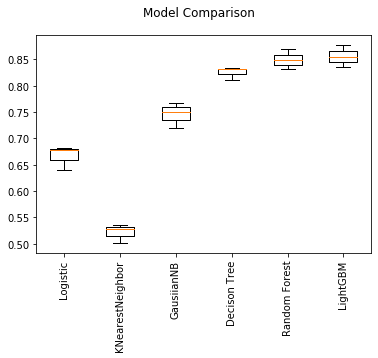

In [48]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
results=[]
names=[]
for name,model in models:
    skfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=4)
    cv_result=cross_val_score(model,x,y,scoring='roc_auc',cv=skfold)
    results.append(cv_result)
    names.append(name)
    print(name,np.mean(cv_result),np.std(cv_result,ddof=1))
    
fig=plt.figure()
fig.suptitle('Model Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()
    

## Building Model for Germany Region

In [49]:
df_Germany.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1.0,0.0,119346.88,1.0
15,616,Germany,Male,45,3,143129.41,2,0.0,1.0,64327.26,0.0
16,653,Germany,Male,58,1,132602.88,1,1.0,0.0,5097.67,1.0
26,756,Germany,Male,36,2,136815.64,1,1.0,1.0,170041.95,0.0
28,574,Germany,Female,43,3,141349.43,1,1.0,1.0,100187.43,0.0


In [50]:
df_Germany.shape

(2509, 11)

In [51]:
df_Germany['Exited'].value_counts()

0.0    1695
1.0     814
Name: Exited, dtype: int64

In [52]:
df_Germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 11 columns):
CreditScore        2509 non-null int64
Geography          2509 non-null object
Gender             2509 non-null object
Age                2509 non-null int64
Tenure             2509 non-null int64
Balance            2509 non-null float64
NumOfProducts      2509 non-null int64
HasCrCard          2509 non-null float64
IsActiveMember     2509 non-null float64
EstimatedSalary    2509 non-null float64
Exited             2509 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 235.2+ KB


In [53]:
df_Germany=df_Germany.drop('Geography',axis=1)


In [54]:
male_german=pd.get_dummies(df_Germany['Gender'],drop_first=True,prefix='Gender')
male_german.head()

,Gender_Male
7,0
15,1
16,1
26,1
28,0


In [55]:

df_Germany=df_Germany.drop('Gender',axis=1)

In [56]:
df_Germany.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,29,4,115046.74,4,1.0,0.0,119346.88,1.0
15,616,45,3,143129.41,2,0.0,1.0,64327.26,0.0
16,653,58,1,132602.88,1,1.0,0.0,5097.67,1.0
26,756,36,2,136815.64,1,1.0,1.0,170041.95,0.0
28,574,43,3,141349.43,1,1.0,1.0,100187.43,0.0


In [57]:
df_Germany['Gender_Male']=male_german

In [58]:
df_Germany.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
7,376,29,4,115046.74,4,1.0,0.0,119346.88,1.0,0
15,616,45,3,143129.41,2,0.0,1.0,64327.26,0.0,1
16,653,58,1,132602.88,1,1.0,0.0,5097.67,1.0,1
26,756,36,2,136815.64,1,1.0,1.0,170041.95,0.0,1
28,574,43,3,141349.43,1,1.0,1.0,100187.43,0.0,0


In [59]:
x=df_Germany.drop('Exited',axis=1)
y=df_Germany['Exited']

In [60]:
import statsmodels.api  as sm
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.544766
         Iterations 6


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 2509
Model:                          Logit   Df Residuals:                     2499
Method:                           MLE   Df Model:                            9
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:                  0.1355
Time:                        13:41:06   Log-Likelihood:                -1366.8
converged:                       True   LL-Null:                       -1581.1
Covariance Type:            nonrobust   LLR p-value:                 1.110e-86
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.6913      0.473     -5.686      0.000      -3.619      -1.764
CreditScore        -0.0002      0.000     -0.503      0.615      -0.001       0.001
Age                 0.0760      0.005     16.043      0.000       0.067       0.085
Tenure             -0.0096      0.016     -0.602      0.547      -0.041       0.022
Balance          1.406e-06   1.77e-06      0.797      0.426   -2.05e-06    4.87e-06
NumOfProducts      -0.2056      0.075     -2.735      0.006      -0.353      -0.058
HasCrCard          -0.0232      0.103     -0.224      0.823      -0.226       0.179
IsActiveMember     -0.9525      0.096     -9.888      0.000      -1.141      -0.764
EstimatedSalary -1.395e-06   8.03e-07     -1.737      0.082   -2.97e-06    1.79e-07
Gender_Male        -0.4133      0.094     -4.416      0.000      -0.597      -0.230
===================================================================================
"""

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns)

,0
const,99.867816
CreditScore,1.005749
Age,1.004700
Tenure,1.007007
Balance,1.003676
NumOfProducts,1.003247
HasCrCard,1.006038
IsActiveMember,1.010679
EstimatedSalary,1.002214
Gender_Male,1.006189


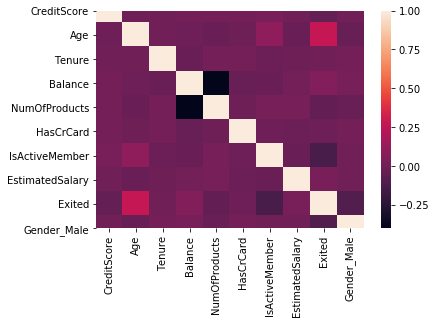

In [62]:
sns.heatmap(df_France.corr())
plt.show()

In [63]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp


,columns,Importance
1,Age,0.263978
3,Balance,0.173200
7,EstimatedSalary,0.141743
4,NumOfProducts,0.135786
0,CreditScore,0.131679
2,Tenure,0.071250
6,IsActiveMember,0.046820
8,Gender_Male,0.019918
5,HasCrCard,0.015625


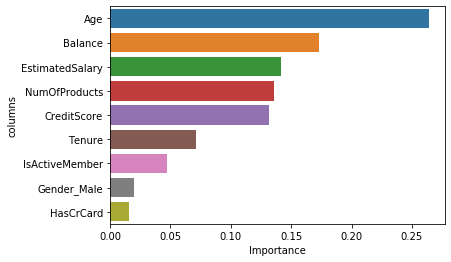

In [64]:
sns.barplot(imp['Importance'],imp['columns'])

## Model Building

In [65]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,60),'weights':['uniform','distance']}
gsearch=GridSearchCV(knn,param_grid=params,cv=10,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [70]:
knn=KNeighborsClassifier(**gsearch.best_params_)

In [71]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dtc = DecisionTreeClassifier(random_state=4)
from scipy.stats import randint as sp_randint

params = {'max_depth': sp_randint(1, 10),
          'min_samples_leaf': sp_randint(1, 20),
          'min_samples_split': sp_randint(2, 20),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, n_iter=500, scoring='roc_auc', cv=3, random_state=4,
                             return_train_score=True)
rsearch.fit(x, y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=4),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169974CC288>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169974CC8C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169974CCC88>},
                   random_state=4, return_train_score=True, scoring='roc_auc')

In [74]:
dtc = DecisionTreeClassifier(**rsearch.best_params_)

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(1,200),
       'criterion':['gini','entropy'],
        'max_features':sp_randint(2,20),
        'max_depth':sp_randint(1,20),
        'min_samples_split':sp_randint(2,50),
        'min_samples_leaf':sp_randint(1,50)}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=25,n_jobs=-1,
                          scoring='roc_auc',cv=3)
rsearch_rfc.fit(x,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.84494408        nan        nan        nan        nan
 0.8179886  0.83442535        nan 0.84286129 0.84379415        nan
        nan 0.84052252 0.847746          nan 0.84511707 0.81136129
 0.79361909        nan        nan 0.8407854  0.82887337        nan
        nan]
  category=UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997FE9FC8>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997FE96C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997FEEEC8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997FEE9C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997FE9388>},
                   scoring='roc_auc')

In [77]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [80]:
from lightgbm import LGBMClassifier
from scipy.stats import uniform as sp_uniform
lgbc = LGBMClassifier()

params = {'n_estimators': sp_randint(50, 300),
         'max_depth': sp_randint(2, 10),
         'learning_rate': sp_uniform(0, 0.5),
         'num_leaves': sp_randint(10, 100)} 

rsearch_lgbc = RandomizedSearchCV(lgbc, param_distributions=params, n_iter=100, cv=3, scoring='roc_auc',
                            n_jobs=-1, random_state=4, return_train_score=True)

rsearch_lgbc.fit(x,y)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997266148>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169973A4A48>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001699758F808>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997675088>},
                   random_state=4, return_train_score=True, scoring='roc_auc')

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lgb_pipe=make_pipeline(StandardScaler(),LGBMClassifier(**rsearch_lgbc.best_params_))

In [83]:
models=[]
models.append(('Logistic',lg))
models.append(('KNearestNeighbor',knn))
models.append(('GausiianNB',gb))
models.append(('Decison Tree',dtc))
models.append(('Random Forest',rfc))
models.append(('LightGBM',lgb_pipe))

Logistic 0.6988185142783235 0.0067100304839892285
KNearestNeighbor 0.6042738805511428 0.022722563037482508
GausiianNB 0.7720236471625519 0.02291864302797477
Decison Tree 0.8294038930433553 0.023318287501367652
Random Forest 0.8507317684772371 0.01649507327065793
LightGBM 0.8616639269919508 0.009556107421864746


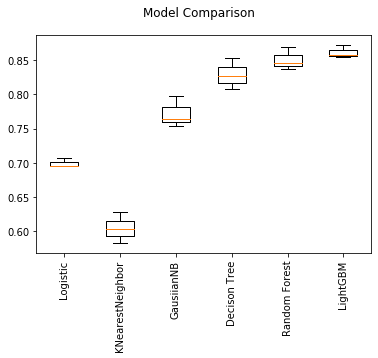

In [84]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
results=[]
names=[]
for name,model in models:
    skfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=4)
    cv_result=cross_val_score(model,x,y,scoring='roc_auc',cv=skfold)
    results.append(cv_result)
    names.append(name)
    print(name,np.mean(cv_result),np.std(cv_result,ddof=1))
    
fig=plt.figure()
fig.suptitle('Model Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()
    

## Building Model for Spain Region

In [85]:
df_Spain.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0.0
4,850,Spain,Female,43,2,125510.82,1,1.0,1.0,79084.10,0.0
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1.0
11,497,Spain,Male,24,3,0.00,2,1.0,0.0,76390.01,0.0
14,635,Spain,Female,35,7,0.00,2,1.0,1.0,65951.65,0.0


In [87]:
df_Spain['Exited'].value_counts()

0.0    2064
1.0     413
Name: Exited, dtype: int64

In [88]:
df_Spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 1 to 9992
Data columns (total 11 columns):
CreditScore        2477 non-null int64
Geography          2477 non-null object
Gender             2477 non-null object
Age                2477 non-null int64
Tenure             2477 non-null int64
Balance            2477 non-null float64
NumOfProducts      2477 non-null int64
HasCrCard          2477 non-null float64
IsActiveMember     2477 non-null float64
EstimatedSalary    2477 non-null float64
Exited             2477 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 232.2+ KB


In [89]:
df_Spain=df_Spain.drop('Geography',axis=1)


In [91]:
male_spain=pd.get_dummies(df_Spain['Gender'],drop_first=True,prefix='Gender')
male_spain.head()

,Gender_Male
1,0
4,0
5,1
11,1
14,0


In [92]:
df_Spain=df_Spain.drop('Gender',axis=1)

In [93]:
df_Spain['Gender_Male']=male_spain

In [94]:
df_Spain.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
1,608,41,1,83807.86,1,0.0,1.0,112542.58,0.0,0
4,850,43,2,125510.82,1,1.0,1.0,79084.10,0.0,0
5,645,44,8,113755.78,2,1.0,0.0,149756.71,1.0,1
11,497,24,3,0.00,2,1.0,0.0,76390.01,0.0,1
14,635,35,7,0.00,2,1.0,1.0,65951.65,0.0,0


In [95]:
x=df_Spain.drop('Exited',axis=1)
y=df_Spain['Exited']

In [96]:
import statsmodels.api  as sm
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.394652
         Iterations 7


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 2477
Model:                          Logit   Df Residuals:                     2467
Method:                           MLE   Df Model:                            9
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:                  0.1243
Time:                        14:20:10   Log-Likelihood:                -977.55
converged:                       True   LL-Null:                       -1116.3
Covariance Type:            nonrobust   LLR p-value:                 1.521e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9758      0.521     -5.716      0.000      -3.996      -1.956
CreditScore        -0.0007      0.001     -1.076      0.282      -0.002       0.001
Age                 0.0647      0.005     11.971      0.000       0.054       0.075
Tenure             -0.0544      0.020     -2.679      0.007      -0.094      -0.015
Balance          3.397e-06   9.42e-07      3.605      0.000    1.55e-06    5.24e-06
NumOfProducts       0.0162      0.105      0.154      0.878      -0.190       0.223
HasCrCard          -0.1418      0.123     -1.152      0.249      -0.383       0.100
IsActiveMember     -1.2676      0.126    -10.092      0.000      -1.514      -1.021
EstimatedSalary  1.192e-06   1.01e-06      1.176      0.239   -7.94e-07    3.18e-06
Gender_Male        -0.5827      0.115     -5.045      0.000      -0.809      -0.356
===================================================================================
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns)

,0
const,86.004919
CreditScore,1.002289
Age,1.019231
Tenure,1.005091
Balance,1.189241
NumOfProducts,1.193676
HasCrCard,1.003884
IsActiveMember,1.015476
EstimatedSalary,1.002215
Gender_Male,1.005387


In [98]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp

,columns,Importance
1,Age,0.205887
3,Balance,0.170318
7,EstimatedSalary,0.162815
0,CreditScore,0.158209
4,NumOfProducts,0.120190
2,Tenure,0.071803
6,IsActiveMember,0.071590
8,Gender_Male,0.023837
5,HasCrCard,0.015352


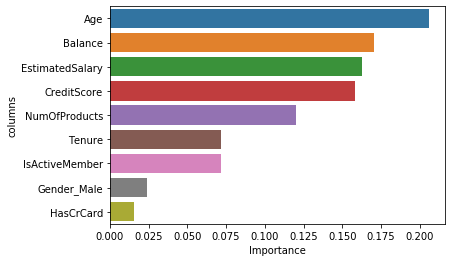

In [99]:
sns.barplot(imp['Importance'],imp['columns'])

## Model Building

In [100]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,40),'weights':['uniform','distance']}
gsearch=GridSearchCV(knn,param_grid=params,cv=10,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [103]:
knn=KNeighborsClassifier(**gsearch.best_params_)

In [104]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dtc = DecisionTreeClassifier(random_state=4)
from scipy.stats import randint as sp_randint

params = {'max_depth': sp_randint(1, 10),
          'min_samples_leaf': sp_randint(1, 20),
          'min_samples_split': sp_randint(2, 20),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, n_iter=500, scoring='roc_auc', cv=3, random_state=4,
                             return_train_score=True)
rsearch.fit(x, y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=4),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997AE4708>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997AE1588>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997CAAD48>},
                   random_state=4, return_train_score=True, scoring='roc_auc')

In [106]:
dtc = DecisionTreeClassifier(**rsearch.best_params_)

In [1]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(1,200),
       'criterion':['gini','entropy'],
        'max_features':sp_randint(2,20),
        'max_depth':sp_randint(1,20),
        'min_samples_split':sp_randint(2,50),
        'min_samples_leaf':sp_randint(1,50)}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=25,n_jobs=-1,
                          scoring='roc_auc',cv=3)
rsearch_rfc.fit(x,y)

NameError: name 'sp_randint' is not defined

In [108]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [109]:
from lightgbm import LGBMClassifier
from scipy.stats import uniform as sp_uniform
lgbc = LGBMClassifier()

params = {'n_estimators': sp_randint(50, 300),
         'max_depth': sp_randint(2, 10),
         'learning_rate': sp_uniform(0, 0.5),
         'num_leaves': sp_randint(10, 100)} 

rsearch_lgbc = RandomizedSearchCV(lgbc, param_distributions=params, n_iter=100, cv=3, scoring='roc_auc',
                            n_jobs=-1, random_state=4, return_train_score=True)

rsearch_lgbc.fit(x,y)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997ADF388>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997ADF748>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016997ADF688>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016998007B88>},
                   random_state=4, return_train_score=True, scoring='roc_auc')

In [110]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lgb_pipe=make_pipeline(StandardScaler(),LGBMClassifier(**rsearch_lgbc.best_params_))

In [111]:
models=[]
models.append(('Logistic',lg))
models.append(('KNearestNeighbor',knn))
models.append(('GausiianNB',gb))
models.append(('Decison Tree',dtc))
models.append(('Random Forest',rfc))
models.append(('LightGBM',lgb_pipe))

Logistic 0.617920426598504 0.01690488110215242
KNearestNeighbor 0.5730143295635609 0.020313769439327178
GausiianNB 0.6988456045699777 0.012094856528061334
Decison Tree 0.8022780440891987 0.02232660348091284
Random Forest 0.8333856243700987 0.026083382207510594
LightGBM 0.8455730620975089 0.019143424724103263


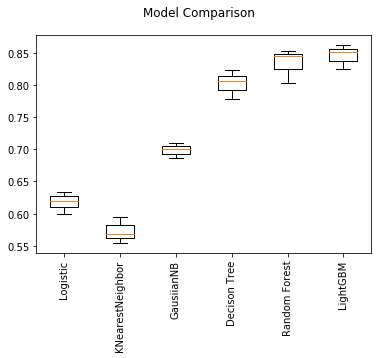

In [112]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
results=[]
names=[]
for name,model in models:
    skfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=4)
    cv_result=cross_val_score(model,x,y,scoring='roc_auc',cv=skfold)
    results.append(cv_result)
    names.append(name)
    print(name,np.mean(cv_result),np.std(cv_result,ddof=1))
    
fig=plt.figure()
fig.suptitle('Model Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()
    